<a href="https://colab.research.google.com/github/Radiotelegrafist/automata_theory/blob/main/Lab6/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import copy
#Зададим класс, конечного акцептора, который выглядит следующим образом:
class NFAcceptor:
  #Есть следующие поля: 
  def __init__(self, alphabet, states, initialState, endState):
    #Алфавит - задает множество возможных символов на вход.
    self.alphabet = set(alphabet)
    #Множество состояний - словарь типа {номер состояния:{возможные переходы}}
    self.states = states
    #Начальное состояние - номер состояния в момент начала работы акцептора
    self.initialState = initialState
    #Конечное состояние - номер состояния/сocтояний в которых акцептор принимает строку
    self.endState = set(endState)

  #Метод, который проверяет, допускается ли input акцептором
  def accept(self, input): 
    #Текущее состояние задается как начальное
    state = self.initialState
    #Переходы будут хранится в виде чписка множеств
    globalStatesSet = list(set([state]))
    localStatesSet = list(set([state]))
    #Рассмотрим вариант, когда слово поустое, тогда проверяются только спонтанные переходы
    if input == "":
      tmpState = state
      spStates = set({})
      statesSet = set({tmpState})
      while (True):
        spStates.update(set(states [tmpState] ['sp']))
        for stateCheck in spStates.copy():
          if (stateCheck in statesSet) == True:
            spStates.remove(stateCheck)
        if len(spStates) == 0:
          break
        tmpState = list(spStates)[0]
        statesSet.update({tmpState})
        globalStatesSet = list([statesSet])
    
    #Составляется список всех возможных состояний при приеме слова
    for char in input:
      localStatesSetTmp = copy.deepcopy(localStatesSet)
      localStatesSet = list(set())
      for currentStatesSet in localStatesSetTmp:
        if type(currentStatesSet) is int:
          currentStatesSet = set({currentStatesSet})
        for currentState in currentStatesSet:
          #Если символ не принадлежит алфавиту, то строка не принимается
          if (char in self.alphabet) == False:
            return False 
          #Сначала принимаются во внимание все спонтанные переходы
          tmpState = currentState
          spStates = set({})
          statesSet = set({})
          while (True):
            spStates.update(set(states [tmpState] ['sp']))
            for stateCheck in spStates.copy():
              if (stateCheck in statesSet) == True:
                spStates.remove(stateCheck)
            if len(spStates) == 0:
              break
            tmpState = list(spStates)[0]
            statesSet.update({tmpState})
          #После чего множество дополняется обычными переходами
          for stateCheck in statesSet.copy():
            statesSet.update(set(states[stateCheck][char]))
          statesSet.update(set(states[currentState][char]))   
          localStatesSet.append(set(statesSet))
      globalStatesSet.append(localStatesSet)

    #Выбираются все возможные конечные состояния
    endPosStates = globalStatesSet[len(globalStatesSet)-1]
    #Если какое-либо из них совпадает с конечным, то слово принимается
    if type(endPosStates) is int:
      endPosStates = list({endPosStates})
    for positionSet in endPosStates:
      if type(positionSet) is int:
        positionSet = set({positionSet})
      for position in positionSet:
        if (position in endState) == True:
          return True
    return False     

    

Для примера рассмотрим:
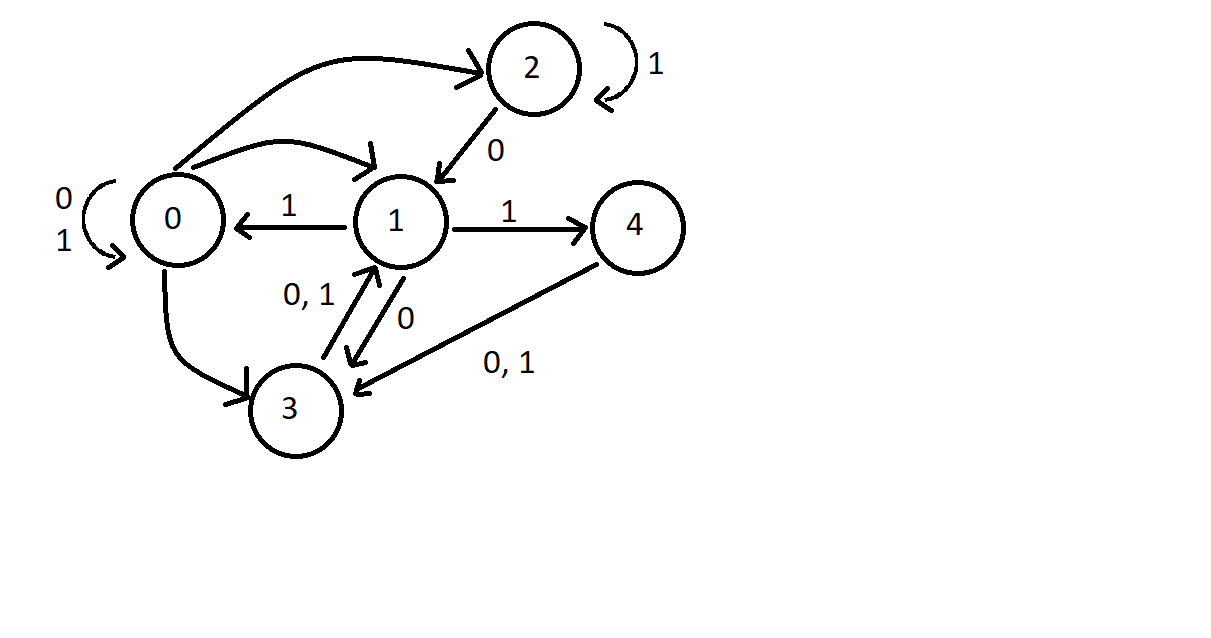

In [2]:
alphabet = {'1', '0'}

states = {0:{'0':{2}, '1':{2}, 'sp':{1, 3}},
       1:{'0':{3}, '1':{0, 4}, 'sp':{}},
       2:{'0':{1}, '1':{2}, 'sp':{}},
       3:{'0':{1}, '1':{1}, 'sp':{}},
       4:{'0':{3}, '1':{3}, 'sp':{}}}

initialState = 0

endState = {4}

acceptor = NFAcceptor(alphabet, states, initialState, endState)

print(acceptor.accept("0101"))
print(acceptor.accept(""))
print(acceptor.accept("1"))
print(acceptor.accept("01010"))

True
False
True
False
